# Weeks 13-14

## Natural Language Processing
***

Read in some packages.

In [10]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score

import matplotlib.pylab as plt
%matplotlib inline

## Basic Feature Engineering
We have examined two ways of dealing with categorical (i.e. text based) data: binarizing/dummy variables and numerical scaling. 

See the following examples for implementation in sklearn to start:

In [11]:
data = pd.read_csv("data/categorical.csv")

FileNotFoundError: File b'data/categorical.csv' does not exist

In [12]:
data

NameError: name 'data' is not defined

### Binarizing
Get a list of features you want to binarize, go through each feature and create new features for each level.

In [13]:
features_to_binarize = ["Gender", "Marital"]

# Go through each feature
for feature in features_to_binarize:
    # Go through each level in this feature (except the last one!)
    for level in data[feature].unique()[0:-1]:
        # Create new feature for this level
        data[feature + "_" + level] = pd.Series(data[feature] == level, dtype=int)
    # Drop original feature
    data = data.drop([feature], 1)

NameError: name 'data' is not defined

In [14]:
data

NameError: name 'data' is not defined

### Numeric scaling
We can also replace text levels with some numeric mapping we create

In [15]:
data['Satisfaction'] = data['Satisfaction'].replace(['Very Low', 'Low', 'Neutral', 'High', 'Very High'], 
                                                    [-2, -1, 0, 1, 2])

NameError: name 'data' is not defined

In [16]:
data

NameError: name 'data' is not defined

## Text classification
We are going to look at some Amazon reviews and classify them into positive or negative.

### Data
The file `data/books.csv` contains 2,000 Amazon book reviews. The data set contains two features: the first column (contained in quotes) is the review text. The second column is a binary label indicating if the review is positive or negative.

Let's take a quick look at the file.

In [17]:
!head -3 data/books.csv

head: data/books.csv: No such file or directory


Let's read the data into a pandas data frame. You'll notice two new attributed in `pd.read_csv()` that we've never seen before. The first, `quotechar` is tell us what is being used to "encapsulate" the text fields. Since our review text is surrounding by double quotes, we let pandas know. We use a `\` since the quote is also used to surround the quote. This backslash is known as an escape character. We also let pandas now this.

In [18]:
data = pd.read_csv("data/books.csv", quotechar="\"", escapechar="\\")

FileNotFoundError: File b'data/books.csv' does not exist

In [19]:
data.head()

NameError: name 'data' is not defined

### Text as a set of features
Going from text to numeric data is very easy. Let's take a look at how we can do this. We'll start by separating out our X and Y data.

In [20]:
X_text = data['review_text']
Y = data['positive']

NameError: name 'data' is not defined

In [21]:
# look at the first few lines of X_text
X_text.head()

NameError: name 'X_text' is not defined

Do the same for Y

In [22]:
# your code here
Y.head()

NameError: name 'Y' is not defined

Next, we will turn `X_text` into just `X` -- a numeric representation that we can use in our algorithms or for queries...

Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors. 

The result of the following is a matrix with each row a file and each column a word. The matrix is sparse because most words only appear a few times. The values are 1 if a word appears in a document and 1 otherwise.

In [23]:
# Create a vectorizer that will track text as binary features
binary_vectorizer = CountVectorizer(binary=True)

# Let the vectorizer learn what tokens exist in the text data
binary_vectorizer.fit(X_text)

# Turn these tokens into a numeric matrix
X = binary_vectorizer.transform(X_text)

NameError: name 'X_text' is not defined

In [24]:
# Dimensions of X:
X.shape


NameError: name 'X' is not defined

There are 2000 documents (each row) and 22,743 words/tokens.

Can look at some of the words by querying the binary vectorizer:

In [107]:
# List of the 20 features (words) in column 10,000
features = binary_vectorizer.get_feature_names()
features[10000:10020]

['hygi',
 'hygience',
 'hygiene',
 'hyojin',
 'hype',
 'hyped',
 'hyper',
 'hyperbole',
 'hyperpat',
 'hyperpussiance',
 'hyperspace',
 'hypnosis',
 'hypnotic',
 'hypnotism',
 'hypnotizing',
 'hypocrisy',
 'hypocrite',
 'hypocritical',
 'hypocritically',
 'hypoglycemia']

Spend some time to look at the binary vectoriser.

Examine the structure of X. Look at some the rows and columns values.

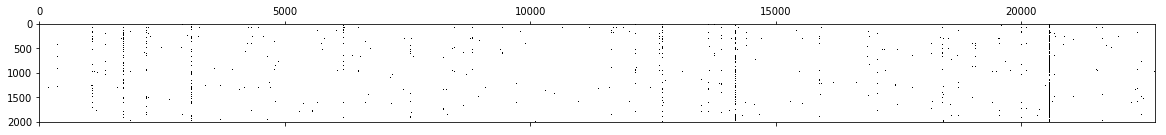

In [108]:
# see the density of 0s and 1s in X
import scipy.sparse as sps
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.spy(X.toarray())
plt.show()

Look at the sparse matrix above. Notice how some columns are quite dark (i.e. the words appear in almost every file). 

What are the 5 most common words?

In [40]:
# your code here
word_dict=binary_vectorizer.vocabulary_
word_sorted=dict(sorted(word_dict.items(), key=lambda d: d[1],reverse=True))
list(word_sorted.keys())[0:5]

['zzzzzzzzzzzz', 'zzzz', 'zylpha', 'zukav', 'zucker']

Write a function that takes the sparse matrix X, and gets the feature list from the vectoriser, and a document index (1 - 2000) and returns a list of the words in the file that corresponds to the index (the list should be obtained from the sparse matrix / bag of words representation NOT from the original data file). 

In [109]:
# complete the function 
# returns vector of words / features
def getWords(bag_of_words, file_index_row, features_list):
    word_marks=bag_of_words.toarray()[file_index_row-1]
    return [features_list[i] for i in range(len(word_marks)) if word_marks[i]==1]
getWords(X, 1, features)


['13',
 '33',
 'about',
 'after',
 'am',
 'an',
 'and',
 'avid',
 'back',
 'better',
 'book',
 'boy',
 'copy',
 'could',
 'don',
 'entire',
 'fire',
 'for',
 'friend',
 'from',
 'got',
 'gotten',
 'had',
 'half',
 'have',
 'headache',
 'horrible',
 'if',
 'in',
 'it',
 'less',
 'life',
 'lit',
 'lower',
 'man',
 'mom',
 'money',
 'my',
 'of',
 'old',
 'on',
 'one',
 'part',
 'picked',
 'possible',
 'purposes',
 'rate',
 'read',
 'reader',
 'reading',
 'relationship',
 'so',
 'spent',
 'star',
 'suffering',
 'than',
 'the',
 'then',
 'this',
 'time',
 'to',
 'up',
 'use',
 'was',
 'waste',
 'wasted',
 'wish',
 'with',
 'world',
 'would',
 'year',
 'your']

### Modeling
We have a 22743 features, let's use them in some different models.

In [110]:
# Create a model
logistic_regression = LogisticRegression()

# Use this model and our data to get 5-fold cross validation accuracy
acc = cross_val_score(logistic_regression, X, Y, scoring="accuracy", cv=5)

# Print out the average accuracy rounded to three decimal points
print ("Mean accuracy of our classifier is " + str(round(np.mean(acc), 3)) )

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Mean accuracy of our classifier is 0.768


In [ ]:
Use the above classifier to classify a new example (new review below):

In [111]:
new_review = """
really bad book!
"""

# your code here ...
logistic_regression.fit(X,Y)
x_test=pd.DataFrame({"x_test":[new_review]})
x_test=binary_vectorizer.transform(x_test)
logistic_regression.predict(x_test)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1])

Let's try using full counts instead of a binary representation (i.e. each time a word appears use the raw count value). 

In [112]:
# Create a vectorizer that will track text as binary features
count_vectorizer = CountVectorizer()

# Let the vectorizer learn what tokens exist in the text data
count_vectorizer.fit(X_text)

# Turn these tokens into a numeric matrix
X = count_vectorizer.transform(X_text)

# Create a model
logistic_regression = LogisticRegression()

# Use this model and our data to get 5-fold cross validation accuracy
acc = cross_val_score(logistic_regression, X, Y, scoring="accuracy", cv=5)

# Print out the average AUC rounded to three decimal points
print( "Accuracy for our classifier is " + str(round(np.mean(acc), 3)) )

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for our classifier is 0.786


Now try using TF-IDF:

In [113]:
# Create a vectorizer that will track text as binary features
tfidf_vectorizer = TfidfVectorizer()

# Let the vectorizer learn what tokens exist in the text data
tfidf_vectorizer.fit(X_text)

# Turn these tokens into a numeric matrix
X = tfidf_vectorizer.transform(X_text)

# Create a model
logistic_regression = LogisticRegression()

# Use this model and our data to get 5-fold cross validation AUCs
acc = cross_val_score(logistic_regression, X, Y, scoring="accuracy", cv=5)

# Print out the average AUC rounded to three decimal points
print( "Accuracy for our classifier is " + str(round(np.mean(acc), 3)) )

Accuracy for our classifier is 0.784


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Use the tfidf classifier to classify some online book reviews from here: https://www.amazon.com/

Hint: You can copy and paste a review from the online site into a multiline string literal with 3 quotes: 
```
"""
I read Princess Elizabeth's Spy last week; funny to think that I picked this one up next, with the theme so similar. It isn't of any deep literary value but it is a really good read when you, as I am, are feeling under the weather and fuzzy headed. Although I had a suspicion from the second chapter (and was ultimately proved right) as to what was going to happen, Bowen's writing is crisp and flows well so I kept reading every page wondering how she was going to connect all the dots.

The story revolves around a stately home and three (well four but one is a ditz) aristocratic daughters who each in their own way become involved in World War 2 spy work. My mind compared them to the sisters in Downton Abbey but the book is original enough not to be any more of a copycat than others of that ilk. Still, anyone who enjoyed Downton Abbey will probably enjoy this one.

There is danger and some allusions to sex but in the main the book relies more on suspense. If you are looking for a serious World War 2 spy novel, this is not it but I enjoyed it.
"""
```

In [75]:
# your code here
new_review = """
I read Princess Elizabeth's Spy last week; funny to think that I picked this one up next, with the theme so similar. It isn't of any deep literary value but it is a really good read when you, as I am, are feeling under the weather and fuzzy headed. Although I had a suspicion from the second chapter (and was ultimately proved right) as to what was going to happen, Bowen's writing is crisp and flows well so I kept reading every page wondering how she was going to connect all the dots.
The story revolves around a stately home and three (well four but one is a ditz) aristocratic daughters who each in their own way become involved in World War 2 spy work. My mind compared them to the sisters in Downton Abbey but the book is original enough not to be any more of a copycat than others of that ilk. Still, anyone who enjoyed Downton Abbey will probably enjoy this one.
There is danger and some allusions to sex but in the main the book relies more on suspense. If you are looking for a serious World War 2 spy novel, this is not it but I enjoyed it.
"""

# your code here ...
logistic_regression.fit(X,Y)
x_test=pd.DataFrame({"x_test":[new_review]})
x_test=tfidf_vectorizer.transform(x_test)
logistic_regression.predict(x_test)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1])

### Extending the implementation
#### Features
Tfidf is looking pretty good! How about adding n-grams? Stop words? Lowercase transforming?

We saw that the most common words include "the" and others above - start by making these stop words.

N-grams are conjunctions of words (e.g. a 2-gram adds all sequences of 2 words)


Look at the docs: `CountVectorizer()` and `TfidfVectorizer()` can be modified to handle all of these things. Work in groups and try a few different combinations of these settings for anything you want: binary counts, numeric counts, tf-idf counts. Here is how you would use these settings:

- "`ngram_range=(1,2)`": would include unigrams and bigrams (ie including combinations of words in sequence)
- "`stop_words="english"`": would use a standard set of English stop words
- "`lowercase=False`": would turn off lowercase transformation (it is actually on by default)!

You can use some of these like this:

`tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), lowercase=False)`

#### Models
Next swap out the line creating a logistic regression with one making a naive Bayes or support vector machines (SVM). SVM have been shown to be very effective in text classification. Naive Bayes has been used a lot also.

For example see: http://www.cs.cornell.edu/home/llee/papers/sentiment.pdf


In [81]:
from sklearn.svm import LinearSVC 
clf=LinearSVC(C=0.2)
tfidf_vectorizer = TfidfVectorizer(lowercase=True,stop_words="english")
tfidf_vectorizer.fit(X_text)
X = tfidf_vectorizer.transform(X_text)
acc = cross_val_score(clf, X.toarray(), Y, scoring="accuracy", cv=5)
print( "Accuracy for our classifier is " + str(round(np.mean(acc), 3)) )

Accuracy for our classifier is 0.782


In [80]:
from sklearn.svm import LinearSVC
from numpy import arange
for c in arange(0.2,0.3,0.01):
    clf=LinearSVC(C=c)
    tfidf_vectorizer = TfidfVectorizer(lowercase=True,stop_words="english")
    tfidf_vectorizer.fit(X_text)
    X = tfidf_vectorizer.transform(X_text)
    acc = cross_val_score(clf, X.toarray(), Y, scoring="accuracy", cv=5)
    print( "Accuracy for our classifier is " + str(round(np.mean(acc), 3)) )

Accuracy for our classifier is 0.782
Accuracy for our classifier is 0.78
Accuracy for our classifier is 0.78
Accuracy for our classifier is 0.78
Accuracy for our classifier is 0.781
Accuracy for our classifier is 0.781
Accuracy for our classifier is 0.781
Accuracy for our classifier is 0.781
Accuracy for our classifier is 0.782
Accuracy for our classifier is 0.781
